In [1]:
import sys
sys.path.append('../utilities')

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

# Developer's code
%load_ext autoreload
%autoreload 2

In [3]:
# Load in the data
soccer_data = pd.read_csv("sample_inputs/soccer.csv")
soccer_data.head()

,player_api_id,player_name,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,fix_vision,fix_penalties,fix_marking,fix_standing_tackle,fix_sliding_tackle,fix_gk_diving,fix_gk_handling,fix_gk_kicking,fix_gk_positioning,fix_gk_reflexes
0,2625,"Patryk Rachwal,18",60.5,61.0,50.0,47.0,46.0,53.0,38.0,56.0,...,4.060606,15.060606,12.060606,12.060606,3.060606,-38.939394,-39.939394,-44.939394,-42.939394,-42.939394
1,2752,Diego Mainz,70.0,71.0,36.0,37.0,72.0,55.0,20.0,45.0,...,8.030303,-8.969697,30.030303,29.030303,21.030303,-32.969697,-37.969697,-36.969697,-34.969697,-28.969697
2,2768,Jose Dorado,72.0,73.0,42.0,42.0,69.0,68.0,28.0,39.0,...,9.090909,-22.909091,26.090909,25.090909,33.090909,-36.909091,-33.909091,-35.909091,-34.909091,-38.909091
3,2770,Ignacio Gonzalez,71.0,72.0,62.0,68.0,71.0,72.0,69.0,71.0,...,18.424242,14.424242,-21.575758,-11.575758,-29.575758,-42.575758,-41.575758,-48.575758,-40.575758,-39.575758
4,2790,Alberto Rey,71.0,76.0,71.0,37.0,55.0,68.0,43.0,64.0,...,2.242424,-3.757576,19.242424,19.242424,11.242424,-49.757576,-36.757576,13.242424,-36.757576,-36.757576


In [4]:
# Load in module for variable clustering
from var_reduction import agglo_feature_clust
from var_reduction import hierarchical_clustering

In [5]:
# Use the same functionality as in the Sphinx tool
agglo_feature_clust.agg_cluster(
    work_dir = "C:\\Users\\Daniel.Wang\\Documents\\Sphinx Tool\\User_Folder\\working_directory", 
    data_dir = "C:\\Users\\Daniel.Wang\\Documents\\Sphinx Tool\\User_Folder\\local_datasets", 
    dataset_name = "soccer", 
    standardize_vars = True,
    variables=['fix_crossing','fix_short_passing','fix_finishing','fix_volleys','fix_heading_accuracy','fix_dribbling','fix_curve','fix_free_kick_accuracy','fix_long_passing','fix_ball_control','fix_acceleration','fix_sprint_speed','fix_agility','fix_reactions','fix_balance','fix_shot_power','fix_jumping','fix_stamina','fix_strength','fix_long_shots','fix_aggression','fix_interceptions','fix_positioning','fix_vision','fix_penalties','fix_marking','fix_standing_tackle','fix_sliding_tackle','fix_gk_diving','fix_gk_handling','fix_gk_kicking','fix_gk_positioning','fix_gk_reflexes'], 
    distance_metric = 'euclidean',only_return = True
)

'Error in loading file - file not foundNo data was able to be loaded \n'

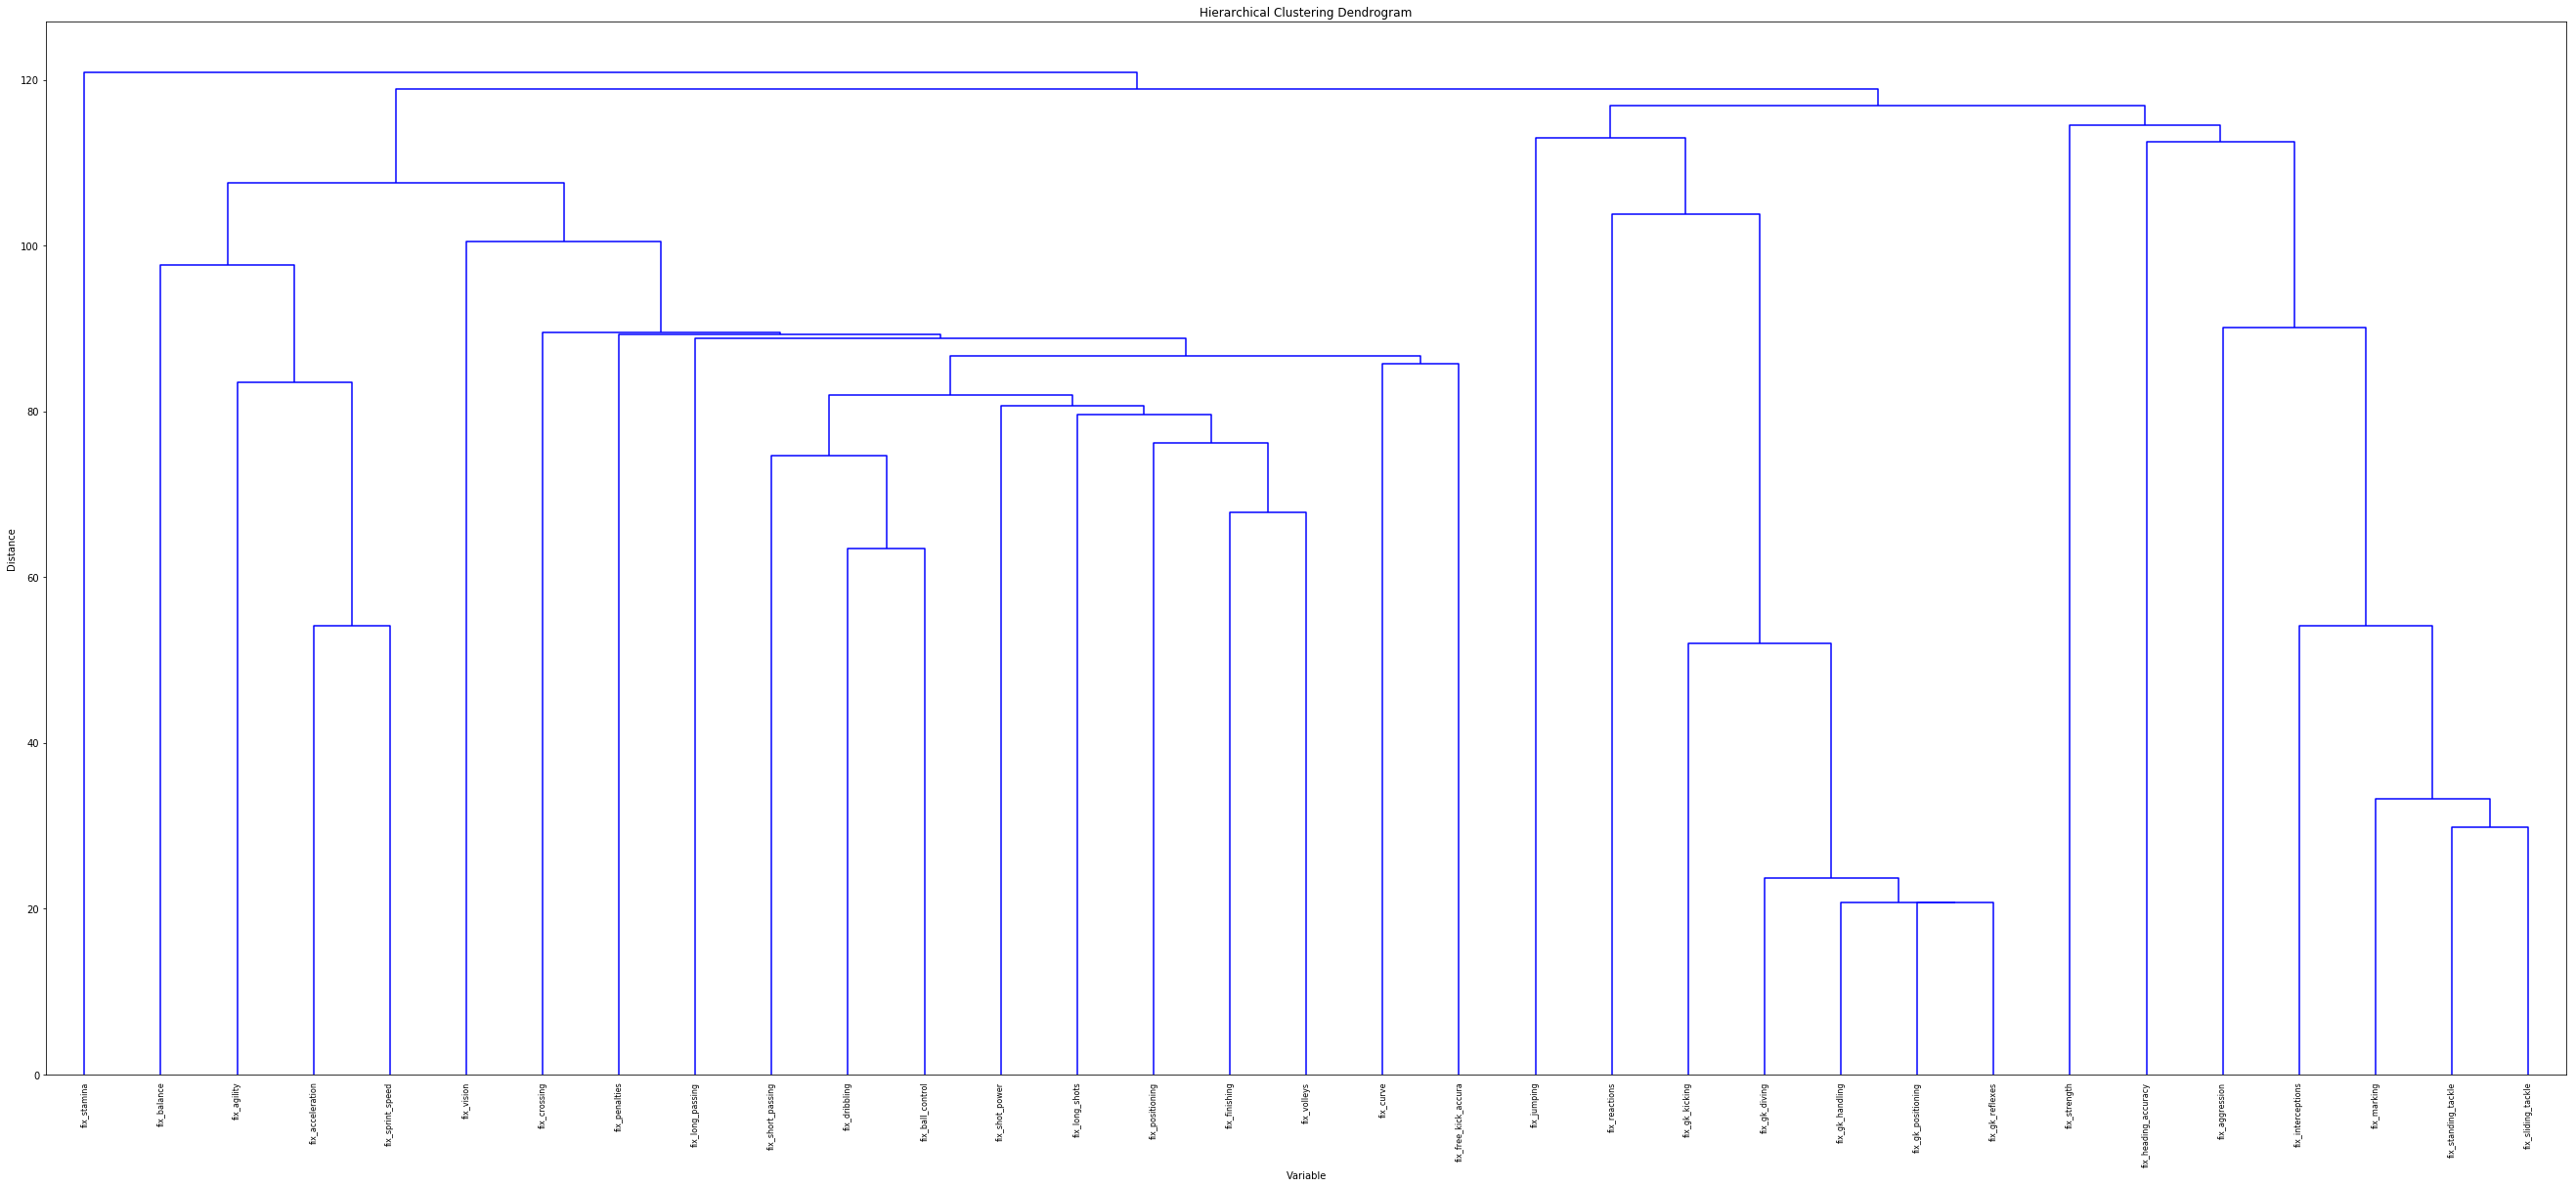

In [16]:
# Manually run numerical variable clustering
from tool_utilities.function_init import *
from scipy.cluster.hierarchy import dendrogram, linkage

data_to_cluster = soccer_data[['fix_crossing','fix_short_passing','fix_finishing','fix_volleys','fix_heading_accuracy','fix_dribbling','fix_curve','fix_free_kick_accuracy','fix_long_passing','fix_ball_control','fix_acceleration','fix_sprint_speed','fix_agility','fix_reactions','fix_balance','fix_shot_power','fix_jumping','fix_stamina','fix_strength','fix_long_shots','fix_aggression','fix_interceptions','fix_positioning','fix_vision','fix_penalties','fix_marking','fix_standing_tackle','fix_sliding_tackle','fix_gk_diving','fix_gk_handling','fix_gk_kicking','fix_gk_positioning','fix_gk_reflexes']]
loaded_data_keep, loaded_data_pretransform = standardize(data_to_cluster)

Z = hierarchical_clustering.numerical_hierarchical(loaded_data_keep, linkage_method='single', metric='euclidean')

plt.figure(figsize=(len(loaded_data_keep.columns)*1.4, len(loaded_data_keep.columns)*0.6))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Variable')
plt.ylabel('Distance')
plot = dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels - automatic rotation looked bad
    leaf_font_size=8.,  # font size for the x axis labels - automatic rotation looked bad
    labels= list(map (lambda x : x[:20],loaded_data_keep)),   # truncate variable name to 20 characters max
    color_threshold = 0  #turn off coloring of tree
)
